# Week 8 - Conversation and Text Generation
Name: Senling Shu

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that use ConvoKit to analyze a Corpus other than 'subreddit-Cornell', including at least one function you find in the package not used above. You can also generate a ConvoKit Corpus from your own dataset based on [their Corpus from .txt files tutorial](https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/converting_movie_corpus.ipynb) or [their Corpus from pandas tutorial](https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/corpus_from_pandas.ipynb), but that may be time-consuming for a weekly assignment. (It could be a great idea for your final project!)

In [ ]:
corpus = Corpus(download('reddit-corpus-small'))

In [ ]:
corpus.print_summary_stats()

Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286


In [ ]:
corpus.random_conversation().meta

{'author_flair_text': '',
 'domain': 'i.redd.it',
 'gilded': 0,
 'gildings': {'gid_1': 0, 'gid_2': 0, 'gid_3': 0},
 'num_comments': 22,
 'stickied': False,
 'subreddit': 'POLITIC',
 'timestamp': 1537984910,
 'title': 'She graduated from high school in 1980 and was going to these parties in 1981-83. Kavanaugh graduated in 1983. Why was she going to high school parties and raping underage boys?'}

In [ ]:
corpus.random_utterance().meta

{'author_flair_text': '',
 'gilded': 0,
 'gildings': {'gid_1': 0, 'gid_2': 0, 'gid_3': 0},
 'permalink': '/r/aww/comments/9f63bd/what_is_this_cutest_caterpillar_i_have_ever_seen/e5udzfp/',
 'retrieved_on': 1538973507,
 'score': 10,
 'stickied': False,
 'subreddit': 'aww',
 'top_level_comment': 'e5u36pp'}

In [ ]:
corpus.random_speaker()

Speaker({'obj_type': 'speaker', 'meta': {'num_posts': 0, 'num_comments': 1}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7f604d5bec90>, 'id': 'FORESKIN_HOLOCAUST'})

In [ ]:
for utt in corpus.iter_utterances():
    print(utt.text)
    break 

Talk about your day. Anything goes, but subreddit rules still apply. Please be polite to each other! 



In [ ]:
##New Function
for speaker in corpus.iter_speakers():
    print(speaker.id)
    break

AutoModerator


In [ ]:
utt = corpus.random_utterance()
convo = utt.get_conversation()
convo_spkrs = list(convo.iter_utterances())
convo_spkrs[:5]

[Utterance({'obj_type': 'utterance', 'meta': {'score': 12, 'top_level_comment': None, 'retrieved_on': 1540143537, 'gilded': 0, 'gildings': {'gid_1': 0, 'gid_2': 0, 'gid_3': 0}, 'subreddit': 'SquaredCircle', 'stickied': False, 'permalink': '/r/SquaredCircle/comments/9h1lc6/just_watched_goto_vs_taichi_for_the_never_title/', 'author_flair_text': "I'M ALIVE!"}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {'num_posts': 2, 'num_comments': 1}, 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7f604d5bec90>, 'id': 'ceps2111'}), 'conversation_id': '9h1lc6', 'reply_to': None, 'timestamp': 1537326775, 'text': 'FUCK YEAH! THIS IS THE GREATEST DAY IN THE HISTORY OF THIS BUSINESS!', 'owner': <convokit.model.corpus.Corpus object at 0x7f604d5bec90>, 'id': '9h1lc6'}),
 Utterance({'obj_type': 'utterance', 'meta': {'score': 17, 'top_level_comment': 'e68i0b0', 'retrieved_on': 1539213657, 'gilded': 0, 'gildings': {'gid_1': 0, 'gid_2': 0, 'gid_3': 0}, 'subreddit': 'Squa

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that perform a similar social similarity or influence analysis on a dataset relevant to your final project (__or one from ConvoKit__). Create relationships between actors in a network based on your dataset (e.g., person to person or document to document), and perform analyses that interrogate the structure of their interactions, similarity, and/or influence on one another. (For example, if relevant to your final project, you could explore different soap operas, counting how many times a character may have used the word love in conversation with another character, and identify if characters in love speak like each other. Or do opposites attract?) What does that analysis and its output reveal about the relative influence of each actor on others? What does it reveal about the social game being played?

<font color="red">Stretch 1:
Render the social network with weights (e.g., based on the number of scenes in which actors appear together), then calculate the most central actors in the show.Realtime output can be viewed in shell.

<font color="red">Stretch 2:
Implement more complex measures of similarity based on the papers you have read.

In [ ]:
INFJ = pd.read_csv("/content/drive/MyDrive/Final Project/INFJ_All_Tweets.csv")

In [ ]:
INFJ.Text

0        @HappyDebbyRyan @electricv0ice I'm an INFJ, to...
1        To my fellow #infj women, a New Year is coming...
2        To my fellow #infj women, a New Year is coming...
3        "Looking for something to fill the void" huh? ...
4                  Thoughts / INFJ https://t.co/7IY9Ws88U7
                               ...                        
25000          @rhysrelic Slytherin, infj e grey's anatomy
25001    @wp_SMAMX @saferprint @worthy4yourlove @cynthi...
25002    @Whippenz @saferprint @worthy4yourlove @cynthi...
25003    @saferprint @worthy4yourlove @cynthia_ann @Che...
25004    @Whippenz @yoga_and_more @saferprint @worthy4y...
Name: Text, Length: 25005, dtype: object

In [ ]:
types = ['ISTJ','ISTP','ISFJ','ISFP',
         'INFJ','INFP','INTJ','INTP',
         'ESTP','ESTJ','ESFP','ESFJ',
         'ENFP','ENFJ','ENTP','ENTJ']

In [ ]:
freq = {}
tt1 = 0
tt2 = 0 
tt3 = 0
tt4 = 0
tt5 = 0
tt6 = 0
tt7 = 0
tt8 = 0
tt9 = 0
tt10 = 0
tt11 = 0
tt12 = 0
tt13 = 0
tt14 = 0
tt15 = 0
tt16 = 0

In [ ]:
for i in INFJ.Text:
  if 'ISTJ' in i:
    tt1 += 1
  if 'ISTP' in i:
    tt2 += 1
  if 'ISFJ' in i:
    tt3 += 1
  if 'ISFP' in i:
    tt4 += 1
  if 'INFJ' in i:
    tt5 += 1
  if 'INFP' in i:
    tt6 += 1
  if 'INTJ' in i:
    tt7 += 1
  if 'INTP' in i:
    tt8 += 1
  if 'ESTJ' in i:
    tt9 += 1
  if 'ESTP' in i:
    tt10 += 1
  if 'ESFJ' in i:
    tt11 += 1
  if 'ESFP' in i:
    tt12 += 1
  if 'ENFJ' in i:
    tt13 += 1
  if 'ENFP' in i:
    tt14 += 1
  if 'ENTP' in i:
    tt15 += 1
  if 'ENTJ' in i:
    tt16 += 1
  
  freq['ISTJ'] = tt1
  freq['ISTP'] = tt2 
  freq['ISFJ'] = tt3 
  freq['ISFP'] = tt4 
  freq['INFJ'] = tt5 
  freq['INFP'] = tt6 
  freq['INTJ'] = tt7 
  freq['INTP'] = tt8 
  freq['ESTJ'] = tt9 
  freq['ESTP'] = tt10 
  freq['ESFJ'] = tt11 
  freq['ESFP'] = tt12 
  freq['ENFJ'] = tt13
  freq['ENFP'] = tt14 
  freq['ENTP'] = tt15
  freq['ENTJ'] = tt16 

In [ ]:
freq

{'ENFJ': 338,
 'ENFP': 323,
 'ENTJ': 107,
 'ENTP': 187,
 'ESFJ': 62,
 'ESFP': 67,
 'ESTJ': 64,
 'ESTP': 89,
 'INFJ': 15915,
 'INFP': 925,
 'INTJ': 593,
 'INTP': 265,
 'ISFJ': 231,
 'ISFP': 142,
 'ISTJ': 119,
 'ISTP': 112}

In [44]:
freq

{'ENFJ': 338,
 'ENTJ': 107,
 'ENTP': 187,
 'ESFJ': 62,
 'ESFP': 67,
 'ESTJ': 64,
 'ESTP': 89,
 'INFJ': 15915,
 'INFP': 925,
 'INTJ': 593,
 'INTP': 265,
 'ISFJ': 231,
 'ISFP': 142,
 'ISTJ': 119,
 'ISTP': 112}

In [69]:
actor_network = nx.Graph()

In [75]:
actor_network.add_edges_from([('ENFP', 'INFJ', {'weight': 323})], color='blue')
actor_network.add_edges_from([('ENFJ', 'INFJ', {'weight': 338})], color='blue')
actor_network.add_edges_from([('ENTJ', 'INFJ', {'weight': 107})], color='blue')
actor_network.add_edges_from([('ENTP', 'INFJ', {'weight': 187})], color='blue')
actor_network.add_edges_from([('ESFJ', 'INFJ', {'weight': 62})], color='blue')
actor_network.add_edges_from([('ESFP', 'INFJ', {'weight': 67})], color='blue')
actor_network.add_edges_from([('ESTJ', 'INFJ', {'weight': 64})], color='blue')
actor_network.add_edges_from([('ESTP', 'INFJ', {'weight': 189})], color='blue')
actor_network.add_edges_from([('INFP', 'INFJ', {'weight': 925})],color='blue')
actor_network.add_edges_from([('INTJ', 'INFJ', {'weight': 593})], color='blue')
actor_network.add_edges_from([('INTP', 'INFJ', {'weight': 265})], color='blue')
actor_network.add_edges_from([('ISFJ', 'INFJ', {'weight': 231})], color='blue')
actor_network.add_edges_from([('ISFP', 'INFJ', {'weight': 142})], color='blue')
actor_network.add_edges_from([('ISTJ', 'INFJ', {'weight': 119})], color='blue')
actor_network.add_edges_from([('ISTP', 'INFJ', {'weight': 112})], color='blue')

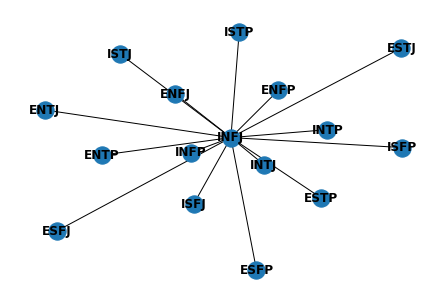

In [76]:
nx.draw(actor_network, with_labels=True, font_weight='bold')

In [79]:
actor_network.nodes()

NodeView(('ENFP', 'INFJ', 'ENFJ', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'))

The corpora I am working with are about MBTI. Here, I am looking specifically at the INFJ corpus. The relationship is created based on the frequency of appearances of every other personality type in the INFJ corpus. More frequent appearances shows a larger bond between the two types of personality. For example, the graph above indicates that INFJs are likely to mention INFPs and INTJs in their posts or they are likely to be mentioned together with the other two types. They might be close friends, loved ones, or even enemies. We can't tell from this graph but we know they have close connections. In contrast, ESTJ and ESFj are rarely connected with INFJs. 

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that generate a BERT-powered chatbot tuned on text related to your final project. What is interesting about this model, and how to does it compare to an untrained model? What does it reveal about the social game involved with your dataset?

In [16]:
from transformers import pipeline

In [14]:
#### Trained with the bert-base-cased model, used as the control condition
unmasker = pipeline('fill-mask', model='bert-base-cased') 

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
unmasker("Extraversion enjoys to [MASK].")

[{'score': 0.02937329187989235,
  'sequence': 'Extraversion enjoys to eat.',
  'token': 3940,
  'token_str': 'eat'},
 {'score': 0.028651176020503044,
  'sequence': 'Extraversion enjoys to kill.',
  'token': 2311,
  'token_str': 'kill'},
 {'score': 0.022506404668092728,
  'sequence': 'Extraversion enjoys to die.',
  'token': 2939,
  'token_str': 'die'},
 {'score': 0.019363747909665108,
  'sequence': 'Extraversion enjoys toil.',
  'token': 2723,
  'token_str': '##il'},
 {'score': 0.016111599281430244,
  'sequence': 'Extraversion enjoys to love.',
  'token': 1567,
  'token_str': 'love'}]

In [17]:
unmasker("Introversion enjoys to [MASK].")

[{'score': 0.03006105124950409,
  'sequence': 'Introversion enjoys to play.',
  'token': 1505,
  'token_str': 'play'},
 {'score': 0.02254554070532322,
  'sequence': 'Introversion enjoys to read.',
  'token': 2373,
  'token_str': 'read'},
 {'score': 0.015525439754128456,
  'sequence': 'Introversion enjoys to talk.',
  'token': 2037,
  'token_str': 'talk'},
 {'score': 0.012528794817626476,
  'sequence': 'Introversion enjoys to watch.',
  'token': 2824,
  'token_str': 'watch'},
 {'score': 0.01213847380131483,
  'sequence': 'Introversion enjoys to enjoy.',
  'token': 5548,
  'token_str': 'enjoy'}]

In [35]:
#####Trained on psychology related corpus 
unmasker = pipeline('fill-mask', model='nlp4good/psych-search')

In [36]:
unmasker("Extraversion enjoys to [MASK].")

[{'score': 0.06487154960632324,
  'sequence': 'extraversion enjoys to us.',
  'token': 227,
  'token_str': 'us'},
 {'score': 0.04077182337641716,
  'sequence': 'extraversion enjoys to me.',
  'token': 366,
  'token_str': 'me'},
 {'score': 0.03487880900502205,
  'sequence': 'extraversion enjoys to health.',
  'token': 947,
  'token_str': 'health'},
 {'score': 0.031738653779029846,
  'sequence': 'extraversion enjoys to you.',
  'token': 3034,
  'token_str': 'you'},
 {'score': 0.022833576425909996,
  'sequence': 'extraversion enjoys to work.',
  'token': 697,
  'token_str': 'work'}]

In [37]:
unmasker("Introversion enjoys to [MASK].")

[{'score': 0.03765008971095085,
  'sequence': 'introversion enjoys to us.',
  'token': 227,
  'token_str': 'us'},
 {'score': 0.03380953148007393,
  'sequence': 'introversion enjoys to me.',
  'token': 366,
  'token_str': 'me'},
 {'score': 0.02870168723165989,
  'sequence': 'introversion enjoys to work.',
  'token': 697,
  'token_str': 'work'},
 {'score': 0.02461439184844494,
  'sequence': 'introversion enjoys to health.',
  'token': 947,
  'token_str': 'health'},
 {'score': 0.024369411170482635,
  'sequence': 'introversion enjoys to self.',
  'token': 1968,
  'token_str': 'self'}]

Because I am interested in studying personality, I think the 'nlp4good/psych-search' might be a good model for me to ask personality-related question. The outcomes show little difference between what "extraversion" and "introversion" enjoy to do. The responses don't actually make that much sense to me. I guess the corpus that the model trained on was pretty limited. In contrast, when I tried the 'bert-base-cased' model, which I used as the controlled/untrained condition, the results are more interesting. The respones for "introversion" make a lot sense, and they are quite different from the responses for "extraversion". Feel like "extraversion" is perceived more negatively. Not sure if extroverts like to kill or die, but the responses are definitely more negative than those for "introversion".   

## <font color="red">*Exercise 4*</font>

<font color="red">What's a research question relevant to your final project that would benefit from a generative or conversational model like GPT-2 or GPT-3? What task would you have it perform, and how would you evaluate the ouput?
    
<font color="red">_Stretch:_ Do it!

I can utilize the GPT-2 or GPT-3 models to ask about traits associated with certain personality types. For example, I can ask that "extraverts tend to..." and see what kinds of responses it generates. I can evaluate the output by comparing the model's response with the answer I get from my analysis of the personality corpus. It will be interesting to see if the model's answers align with the data I have.   

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer_gpt = AutoTokenizer.from_pretrained("gpt2")
model_gpt = AutoModelWithLMHead.from_pretrained("gpt2")

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

In [ ]:
sequence1 = "extraverts enjoy to"

In [ ]:
input = tokenizer_gpt.encode(sequence1, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50, bos_token_id=1, pad_token_id=1, eos_token_ids=1)

resulting_string = tokenizer_gpt.decode(generated.tolist()[0])
print(resulting_string)

extraverts enjoy to the same degree as the rest of us.

The fact that we are all so much more than we are is a testament to the fact that we are all so much more than we are.

We are all so


In [ ]:
sequence2 = "introverts enjoy to"
input = tokenizer_gpt.encode(sequence2, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50, bos_token_id=1, pad_token_id=1, eos_token_ids=1)

resulting_string = tokenizer_gpt.decode(generated.tolist()[0])
print(resulting_string)

introverts enjoy to be able to see the world through their eyes.

The first time I saw the movie, I was in a room with a bunch of people. I was in a room with a bunch of people, and I was
